# Лабораторная работа №4. PCA


1. Подготовка данных + нормировка до определения главных компонент

2. Реализовать метод главных компонент

3. Выполнить преобразование Кархунена-Лоэва. (см. http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)

4. Реализовать критерии выбора числа главных компонент (Кайзера, сломанной трости, каменистой осыпи)

 

Результаты:

Для каждого критерия:

1. Количество отобранных главных компонент 

2. % описываемой дисперсии выбранными главными компонентами

 

Визуализация

1. график % описываемой дисперсии в зависимости от количества главных компонент. (пометить на графике числа ГК по разным критериям) (оси подписывать)

 

Демонстрация работоспособности лабораторной работы

1. Протестировать данный метод на 3 датасетах с размерностью ~20, ~60, ~1000

2. Продемонстрировать различное количество главных компонент по различным критериям

3. Продемонстрировать "хороший" и "плохой" случаи применения МГК. Пояснить, что Вы считаете "плохим", а что "хорошим" случаем работы МГК

 

Входные/выходные данные

1. Входные данные (датасеты) в виде текстового файла. (к примеру, экспорт таблицы из Excel в формате TXT или CSV)

2. Выходные данные (результаты) сохраняются в виде HTML-файла (текст и графики)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

%matplotlib inline

In [2]:
data = pd.read_csv('telecom_churn.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
encoder = OrdinalEncoder()

In [6]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [8]:
categorical = ['State', 'International plan', 'Voice mail plan']

In [9]:
np.unique(data[categorical[2]],return_counts = True)

(array(['No', 'Yes'], dtype=object), array([2411,  922], dtype=int64))

In [10]:
to_red_data = data.drop(columns = 'Churn')

In [11]:
len(to_red_data.columns)

19

In [13]:
to_red_data[categorical] = encoder.fit_transform(to_red_data[categorical])

In [15]:
to_red_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16.0,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35.0,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31.0,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35.0,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36.0,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [16]:
X = np.array(to_red_data)
X = (X - X.mean()) / X.std()

In [17]:
model = PCA()

In [18]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print("Доли описываемой дисперсии, после применения метода (для каждой из компонент): \n {} ".format(model.explained_variance_ratio_.round(decimals = 3)))

Доли описываемой дисперсии, после применения метода (для каждой из компонент): 
 [0.232 0.198 0.193 0.136 0.12  0.031 0.03  0.029 0.017 0.014 0.001 0.
 0.    0.    0.    0.    0.    0.    0.   ] 


### Преобразование Карунена-Лоева

In [120]:
def KarLoeve(pca_model, centered_data):
    array = pca_model.fit_transform(centered_data)
    array = array / np.sqrt(pca_model.explained_variance_)
    return array

In [123]:
kar_loeve_comp = KarLoeve(model, X)

### Критерии отбора компонент

In [187]:
def kaizer(model):
    l = []
    for k in model.explained_variance_:
        if (k > 1): 
            l.append(k)
    if len(l) == 0:       
        return 0
    else:
        return len(l)
def broken_stick(mas, N):
    l = np.random.sample(N)
    l = sorted(l, reverse=True)
    l = [1] + l
    l1 = []
    list = []
    for i in range(len(l)):
        l1.append(sum(l[i:]) / len(l))
    for i in range(len(l1) - 2):
        if (mas[i] > l1[i]):
            list.append(mas[i])
    if len(list) == 0:
        return 0
    else:
        return list

In [188]:
print("Число компонент по критерию Кайзера :", kaizer(model))

Число компонент по критерию Кайзера : 0


In [189]:
print("Число компонент по критерию сломанной трости :", broken_stick(model.explained_variance_ratio_, 19))

Число компонент по критерию сломанной трости : 0


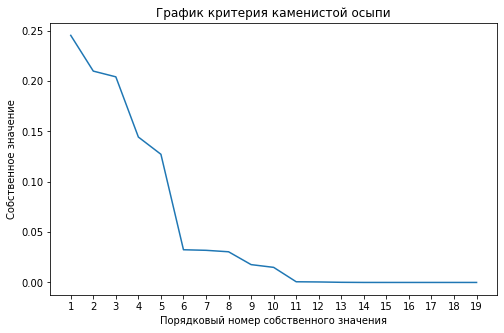

In [190]:
plt.figure(figsize = (8,5))
plt.plot(np.arange(1,len(model.explained_variance_) + 1) , model.explained_variance_)
plt.xlabel('Порядковый номер собственного значения')
plt.ylabel('Собственное значение')
plt.title('График критерия каменистой осыпи')
plt.xticks(ticks = np.arange(1,len(model.explained_variance_) +1))
plt.show()

In [191]:
print('Число компонент по критерию каменистой осыпи: 6')
print('Доля описываемой дисперсии: {:.2%}'.format(np.sum(model.explained_variance_ratio_[0:6])))

Число компонент по критерию каменистой осыпи: 6
Доля описываемой дисперсии: 90.91%


### Датасет DIGITS

In [124]:
from sklearn.datasets import load_digits

In [125]:
data = load_digits()

In [128]:
data.data.shape

(1797, 64)

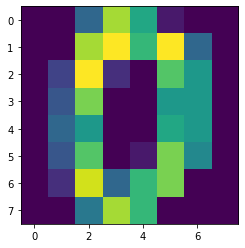

In [131]:
plt.imshow(data.data[0].reshape(8,8))

In [134]:
pca_digits = PCA()

In [149]:
data_reduced = data.data / 16

In [150]:
data_reduced.shape

(1797, 64)

In [151]:
pca_digits.fit(data_reduced)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [152]:
print("Доли описываемой дисперсии, после применения метода (для каждой из компонент): \n {} ".format(pca_digits.explained_variance_ratio_.round(decimals = 3)))

Доли описываемой дисперсии, после применения метода (для каждой из компонент): 
 [0.149 0.136 0.118 0.084 0.058 0.049 0.043 0.037 0.034 0.031 0.024 0.023
 0.018 0.018 0.015 0.014 0.013 0.012 0.01  0.009 0.009 0.008 0.008 0.007
 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ] 


Число компонент по критерию Кайзера : 0
Число компонент по критерию сломанной трости : 0


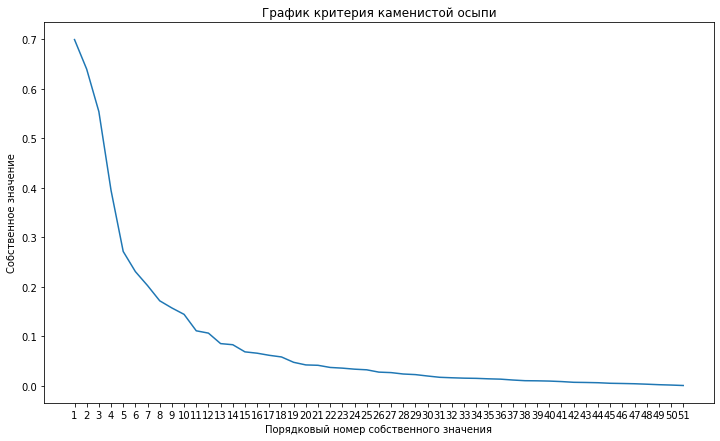

Число компонент по критерию каменистой осыпи: 8
Доля описываемой дисперсии: 96.79%


In [192]:
print("Число компонент по критерию Кайзера :", kaizer(pca_digits))


print("Число компонент по критерию сломанной трости :", broken_stick(pca_digits.explained_variance_ratio_, 64))


plt.figure(figsize = (12,7))
plt.plot(np.arange(1,len(pca_digits.explained_variance_[:51]) + 1) , pca_digits.explained_variance_[:51])
plt.xlabel('Порядковый номер собственного значения')
plt.ylabel('Собственное значение')
plt.title('График критерия каменистой осыпи')
plt.xticks(ticks = np.arange(1,len(pca_digits.explained_variance_[:51]) +1))
plt.show()


print('Число компонент по критерию каменистой осыпи: 8')
print('Доля описываемой дисперсии: {:.2%}'.format(np.sum(model.explained_variance_ratio_[0:8])))

### Датасет Fashion MNIST

In [169]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [170]:
x_train.shape

(60000, 28, 28)

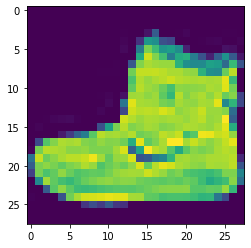

In [174]:
plt.imshow(x_train[0])

In [176]:
to_pca = x_train[:1000] / 255

In [179]:
to_pca.reshape(1000,28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [180]:
mnist_pca = PCA()
mnist_pca.fit(to_pca.reshape(1000,28*28))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Число компонент по критерию Кайзера : 8
Доля описываемой дисперсии по критерию Кайзера: 96.79%
Число компонент по критерию сломанной трости : 0


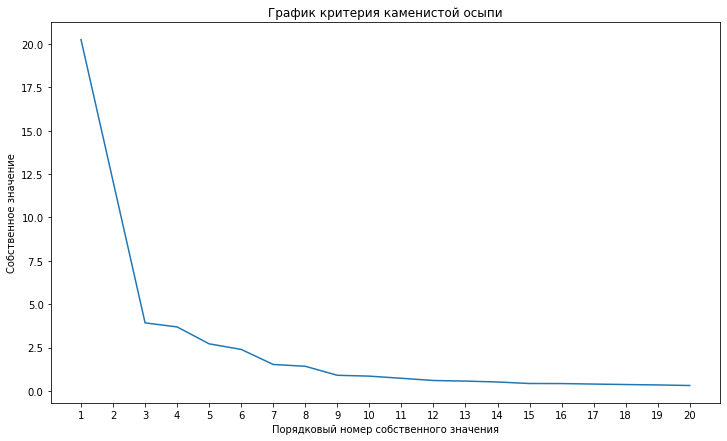

Число компонент по критерию каменистой осыпи: 3
Доля описываемой дисперсии: 62.22%


In [194]:
print("Число компонент по критерию Кайзера :", kaizer(mnist_pca))
print('Доля описываемой дисперсии по критерию Кайзера: {:.2%}'.format(np.sum(model.explained_variance_ratio_[0:kaizer(mnist_pca)])))

print("Число компонент по критерию сломанной трости :", broken_stick(mnist_pca.explained_variance_ratio_, 28*28))


plt.figure(figsize = (12,7))
plt.plot(np.arange(1,len(mnist_pca.explained_variance_[:20]) + 1) , mnist_pca.explained_variance_[:20])
plt.xlabel('Порядковый номер собственного значения')
plt.ylabel('Собственное значение')
plt.title('График критерия каменистой осыпи')
plt.xticks(ticks = np.arange(1,len(mnist_pca.explained_variance_[:20]) +1))
plt.show()


print('Число компонент по критерию каменистой осыпи: 3')
print('Доля описываемой дисперсии: {:.2%}'.format(np.sum(model.explained_variance_ratio_[0:3])))